# Practical 5

In [ ]:
''' 
Aim:
    Apply simple K-means algorithm for clustering any dataset. Compare the performance of
    clusters by varying the algorithm parameters. For a given set of parameters, plot a line graph
    depicting MSE obtained after each iteration.
'''

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import io
import sys

In [4]:
iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Capture sklearn KMeans verbose output
buffer = io.StringIO()
sys.stdout = buffer

kmeans = KMeans(
    n_clusters=3,
    init="k-means++",
    max_iter=20,
    random_state=42,
    verbose=1
)
kmeans.fit(X_scaled)

# Restore stdout
sys.stdout = sys.__stdout__

log_output = buffer.getvalue()
print(log_output)


Initialization complete
Iteration 0, inertia 286.1901934542469.
Iteration 1, inertia 192.02316340354946.
Iteration 2, inertia 191.2699698325646.
Iteration 3, inertia 191.02473685317972.
Converged at iteration 3: strict convergence.

Inertia per iteration: [286.1901934542469, 192.02316340354946, 191.2699698325646, 191.02473685317972]
k=2 → Final Inertia: 222.36170496502305
k=3 → Final Inertia: 191.02473685317972
k=4 → Final Inertia: 114.35407164049778
k=5 → Final Inertia: 91.04766991109528
MSE per iteration: [np.float64(292.28552373875914), np.float64(154.35992035483838), np.float64(144.4962206776189), np.float64(141.21719001205543), np.float64(140.36037767659764), np.float64(140.08951698482218), np.float64(140.0327527742865)]
k = 2 → Final MSE = 222.36170496502308
k = 3 → Final MSE = 140.0327527742865
k = 4 → Final MSE = 114.55684421262919
k = 5 → Final MSE = 103.61606473487709
k=2 → Final Inertia: 222.36170496502305
k=3 → Final Inertia: 191.02473685317972
k=4 → Final Inertia: 114.3540

In [13]:
import re
inertia_history = []

for line in log_output.split("\n"):
    match = re.search(r"inertia ([0-9.]+)", line)
    if match:
        value = match.group(1).rstrip(".")   # <-- FIX HERE
        inertia_history.append(float(value))

print("Inertia per iteration:", inertia_history)

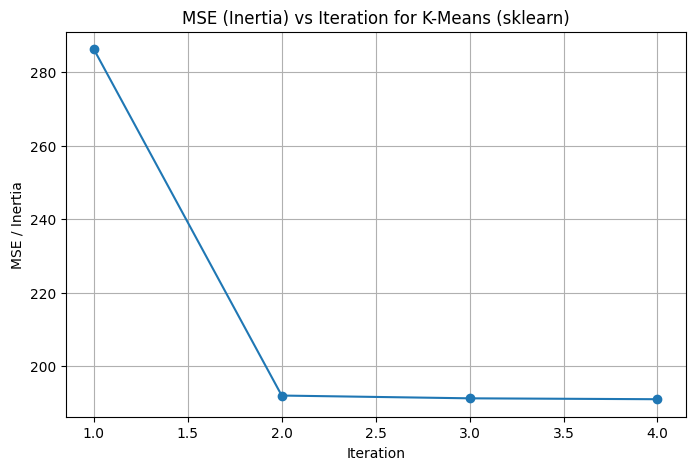

In [9]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(inertia_history)+1), inertia_history, marker="o")
plt.title("MSE (Inertia) vs Iteration for K-Means (sklearn)")
plt.xlabel("Iteration")
plt.ylabel("MSE / Inertia")
plt.grid(True)
plt.show()
